In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded 561 total rows from 32 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               509  0.003926  0.004263  0.022380  0.000163   
1               540  0.003701  0.004121  0.022380  0.000163   
2               541  0.003694  0.003573  0.022380  0.000163   
3               550  0.003634  0.002875  0.013124  0.000163   
4               560  0.003569  0.002889  0.013124  0.000163   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  28                   20             0  
4                  28                   20             0  

Basic Stats:
       received packets    IAT_Mean     IAT_Std     IAT_Max     IAT_Min  \
count        561.000000  561.000000  561.000000  561.000000  561.000000   
mean         459.352941    0.015590    0.009375    0.052552    0.0

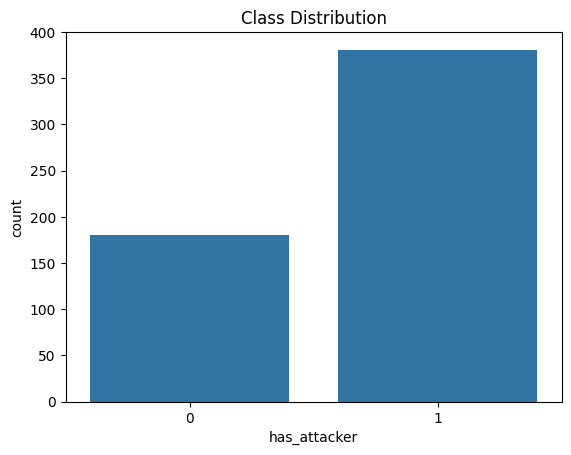


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       115

    accuracy                           0.99       169
   macro avg       0.99      1.00      0.99       169
weighted avg       0.99      0.99      0.99       169


Confusion Matrix:
[[ 54   0]
 [  1 114]]


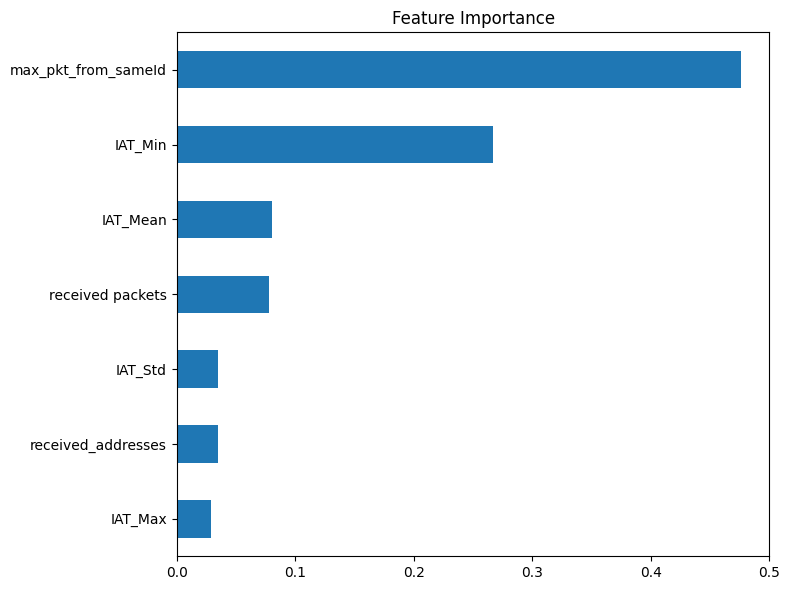

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_22.json',
    'Dataset_timewin_28.json',
    'Dataset_timewin_40.json',
    'Dataset_timewin_46.json',
    'Dataset_timewin_52.json',
    'Dataset_timewin_58.json',
    'Dataset_timewin_64.json',
    'Dataset_timewin_76.json',
    'Dataset_timewin_70.json',
    'Dataset_timewin_82.json',
    'Dataset_timewin_88.json',
    'Dataset_timewin_94.json',
    'Dataset_timewin_100.json',
    'Dataset_timewin_106.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json',
    'Dataset_timewin_454.json',
    'Dataset_timewin_448.json',
    'Dataset_timewin_442.json',
    'Dataset_timewin_436.json',
    'Dataset_timewin_430.json',
    'Dataset_timewin_58.json',
    'Dataset_timewin_424.json',
    'Dataset_timewin_418.json',
    'Dataset_timewin_406.json',
    'Dataset_timewin_412.json',
    'Dataset_timewin_400.json',
    'Dataset_timewin_394.json',
    'Dataset_timewin_388.json',
    'Dataset_timewin_382.json'
    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 1306 total rows from 76 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               308  0.006489  0.006567  0.022543  0.000566   
1               371  0.005387  0.005534  0.022543  0.000566   
2               341  0.005861  0.005954  0.022388  0.000163   
3               320  0.006237  0.007856  0.033862  0.000163   
4               399  0.005002  0.007182  0.033862  0.000163   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  17                   20             0  
1                  20                   20             0  
2                  19                   20             0  
3                  16                   20             0  
4                  21                   20             0  

Basic Stats:
       received packets     IAT_Mean      IAT_Std      IAT_Max      IAT_Min  \
count       1306.000000  1306.000000  1306.000000  1306.000000  1306.000000   
mean         467.813170     0.014925     0.009801     0.0

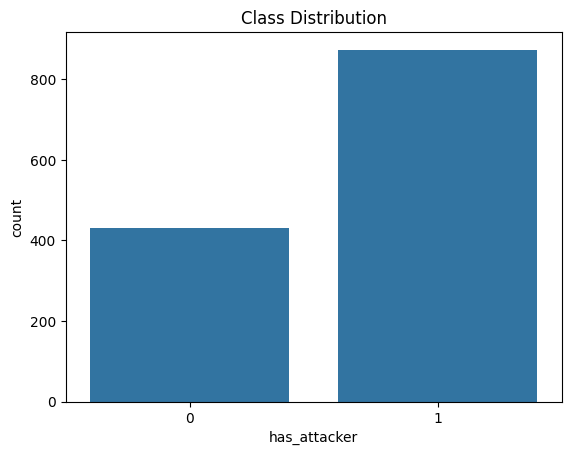


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.99      1.00       262

    accuracy                           0.99       392
   macro avg       0.99      1.00      0.99       392
weighted avg       0.99      0.99      0.99       392


Confusion Matrix:
[[130   0]
 [  2 260]]


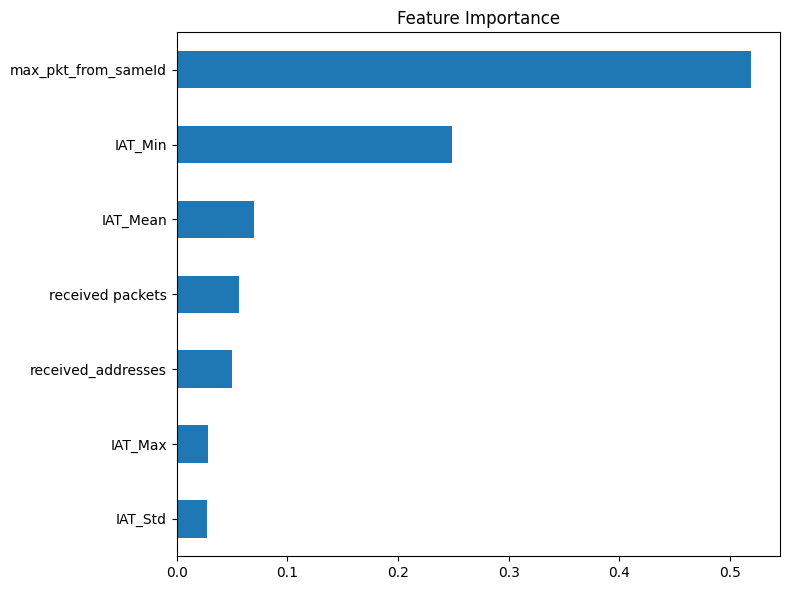

In [6]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.

file_list = glob.glob("Dataset_timewin_*.json")


# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()